<h1><center> TP1 : Basic functions for Supervised Machine Learning. </center></h1>

<center> AFANGNIBO Kokou Jérôme, HEDFI Houeida and KONDO Godson Leopold Jr.
 



# Imported packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MaxAbsScaler, StandardScaler
from sklearn.metrics import balanced_accuracy_score, make_scorer, confusion_matrix


%matplotlib notebook

#  PART 1 -- MNIST


In the first part of TP1 we pursue the following goals:
1. Apply standard ML algorithms on a standard benchmark data
2. Learn basic means of data visualizations
3. Get familiar with sklearn's GridSearchCV and Pipeline

# Loading the data

MNIST dataset consists of black and white images of hand-written digits from $0$ to $9$ of size $28 \times 28$.
In this exercise we will work with a small sample from the original MNIST dataset. 


Hence, the observations $(X_1, Y_1), \ldots, (X_n, Y_n)$ are such that $X_i \in \mathbb{R}^{784}$ and $Y_i \in \{0, \ldots, 9\}$. To be more precise, each component of vector $X_i$ is a number between $0$ and $255$, which signifies the intensity of black color.

The initial goal is to build a classifier $\hat g$, which receives a new image $X$ and outputs the number that is present on the image.

In [2]:
X_train = np.load('data/mnist1_features_train.npy', allow_pickle=True)
y_train = np.load('data/mnist1_labels_train.npy', allow_pickle=True)
X_test = np.load('data/mnist1_features_test.npy', allow_pickle=True)
y_test = np.load('data/mnist1_labels_test.npy', allow_pickle=True)

n_samples, n_features = X_train.shape # extract dimensions of the design matrix
print('Train data contains: {} samples of dimension {}'.format(n_samples, n_features))
print('Test data contains: {} samples'.format(X_test.shape[0]))

Train data contains: 2000 samples of dimension 784
Test data contains: 200 samples


# Looking at the data

Since each observation is actually an image, we can visualize it.

<IPython.core.display.Javascript object>


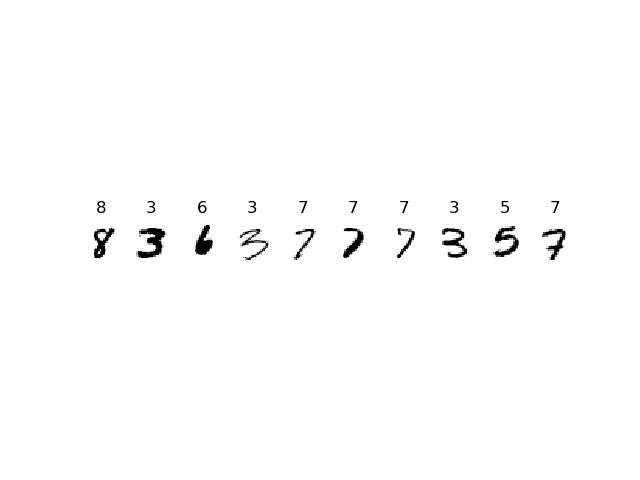

In [3]:
axes = plt.subplots(1, 10)[1]  # creates a grid of 10 plots

# More details about zip() function here https://docs.python.org/3.3/library/functions.html#zip
images_and_labels = list(zip(X_train, y_train)) 
for ax, (image, label) in zip(axes, images_and_labels[:10]):
    ax.set_axis_off()
    ax.imshow(image.reshape((28, 28)), cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('{}'.format(label))

In [4]:
for i in range(10):
    print('Number of {}s in the train dataset is {}'.format(i, np.sum([y_train == str(i)])))

Number of 0s in the train dataset is 196
Number of 1s in the train dataset is 226
Number of 2s in the train dataset is 214
Number of 3s in the train dataset is 211
Number of 4s in the train dataset is 187
Number of 5s in the train dataset is 179
Number of 6s in the train dataset is 175
Number of 7s in the train dataset is 225
Number of 8s in the train dataset is 186
Number of 9s in the train dataset is 201


From the above, we conclude that the dataset is rather balanced, that is, each class contains similar amount of observations. The rarest class is $y = 6$ with $175$ examples and the most common class is $y = 1$ with $226$ examples.

# Cross-validation with GridSearchCV

**GridSearchCV with kNN : a simple baseline**

In [5]:
# GridSearchCV with kNN : a simple baseline
knn = KNeighborsClassifier() # defining classifier
parameters = {'n_neighbors': [1, 2, 3, 4, 5]} # defining parameter space
clf = GridSearchCV(knn, parameters, cv=3)
clf.fit(X_train, y_train)

print('Returned hyperparameter: {}'.format(clf.best_params_))
print('Best classification accuracy in train is: {}'.format(clf.best_score_))
print('Classification accuracy on test is: {}'.format(clf.score(X_test, y_test)))

Returned hyperparameter: {'n_neighbors': 1}
Best classification accuracy in train is: 0.891497944721333
Classification accuracy on test is: 0.875


**Explicit results**

In [6]:
clf.cv_results_

{'mean_fit_time': array([0.21251098, 0.23603447, 0.29502145, 0.20145059, 0.19980963]),
 'std_fit_time': array([0.01832751, 0.03277885, 0.13343732, 0.00879384, 0.01017975]),
 'mean_score_time': array([1.39560302, 1.51262363, 1.49488886, 1.3081886 , 1.33289766]),
 'std_score_time': array([0.03474256, 0.211513  , 0.13406987, 0.01419091, 0.05981846]),
 'param_n_neighbors': masked_array(data=[1, 2, 3, 4, 5],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 1},
  {'n_neighbors': 2},
  {'n_neighbors': 3},
  {'n_neighbors': 4},
  {'n_neighbors': 5}],
 'split0_test_score': array([0.89955022, 0.88155922, 0.90104948, 0.89055472, 0.89205397]),
 'split1_test_score': array([0.88755622, 0.85607196, 0.87856072, 0.87406297, 0.87106447]),
 'split2_test_score': array([0.88738739, 0.85285285, 0.86786787, 0.86186186, 0.87537538]),
 'mean_test_score': array([0.89149794, 0.86349468, 0.88249269, 0.87549318, 0.87949794]),
 '

--------------------------------------------------------------------------------------------------------------------

**SVM Classifier**

In [7]:
# SVM Classifier
svc = LinearSVC(max_iter=5000)
parameters2 = {'C': np.logspace(-8, 8, 17, base=2)} # defining parameter space
clf2 = GridSearchCV(svc, parameters2, cv=3)
clf2.fit(X_train, y_train)


print('Returned hyperparameter: {}'.format(clf2.best_params_))
print('Best classification accuracy in train is: {}'.format(clf2.best_score_))
print('Classification accuracy on test is: {}'.format(clf2.score(X_test, y_test)))

C:\Users\afanb\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\afanb\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\afanb\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\afanb\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Returned hyperparameter: {'C': 0.00390625}
Best classification accuracy in train is: 0.8095074084579332
Classification accuracy on test is: 0.795


C:\Users\afanb\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


--------------------------------------------------------------------------------------------------------------------

**SVM Classifier + Pipeline**

In [8]:
# SVM Classifier + Pipeline
pipe = Pipeline([('scaler', MaxAbsScaler()), ('svc', svc)])
parameters3 = {'svc__C': np.logspace(-8, 8, 17, base=2)} # defining parameter space
clf3 = GridSearchCV(pipe, parameters3, cv=3)
clf3.fit(X_train, y_train)

print('Returned hyperparameter: {}'.format(clf3.best_params_))
print('Best classification accuracy in train is: {}'.format(clf3.best_score_))
print('Classification accuracy on test is: {}'.format(clf3.score(X_test, y_test)))

Returned hyperparameter: {'svc__C': 0.015625}
Best classification accuracy in train is: 0.863002432717575
Classification accuracy on test is: 0.84


In [9]:
pipe.fit(X_train, y_train)
pipe.predict(X_test)

array(['4', '1', '6', '5', '3', '4', '1', '3', '3', '1', '0', '6', '3',
       '4', '9', '7', '6', '4', '1', '6', '1', '4', '3', '8', '9', '4',
       '7', '8', '1', '1', '5', '6', '1', '4', '0', '2', '0', '9', '9',
       '6', '2', '4', '6', '4', '9', '8', '7', '7', '0', '9', '4', '6',
       '9', '7', '5', '2', '2', '7', '1', '6', '5', '4', '2', '8', '9',
       '6', '3', '2', '8', '1', '7', '0', '1', '3', '2', '0', '9', '0',
       '0', '0', '1', '0', '8', '7', '9', '9', '2', '1', '8', '9', '3',
       '1', '5', '1', '3', '1', '3', '0', '8', '7', '0', '6', '5', '9',
       '4', '0', '2', '5', '6', '9', '7', '5', '6', '3', '9', '7', '9',
       '0', '9', '3', '9', '1', '3', '1', '3', '6', '1', '3', '8', '8',
       '2', '9', '9', '6', '2', '7', '4', '3', '9', '2', '7', '0', '8',
       '1', '2', '3', '6', '0', '8', '1', '5', '0', '0', '3', '0', '4',
       '3', '1', '3', '9', '0', '4', '3', '9', '4', '8', '4', '7', '3',
       '0', '9', '5', '8', '4', '6', '6', '3', '0', '4', '7', '0

--------------------------------------------------------------------------------------------------------------------

**Logistic regression**

In [10]:
# Logistic regression
pipe = Pipeline([('scaler', StandardScaler()), ('logreg', LogisticRegression(max_iter=5000))])
parameters4 = {'logreg__C': np.logspace(-8, 8, 17, base=2)} # defining parameter space
clf4 = GridSearchCV(pipe, parameters4, cv=3)
clf4.fit(X_train, y_train)

print('Returned hyperparameter: {}'.format(clf4.best_params_))
print('Best classification accuracy in train is: {}'.format(clf4.best_score_))
print('Classification accuracy on test is: {}'.format(clf4.score(X_test, y_test)))

Returned hyperparameter: {'logreg__C': 0.0078125}
Best classification accuracy in train is: 0.8705039372205788
Classification accuracy on test is: 0.84


--------------------------------------------------------------------------------------------------------------------

**Random Forest, a method to achieve test accuracy ≥ 0.9**

In [11]:
# GridsearchCV with Random Forest + Pipeline
from sklearn.ensemble import RandomForestClassifier  #Random Forest algorithm
pipe = Pipeline([('scaler', StandardScaler()), ('randomforest', RandomForestClassifier(random_state=42))])
parameters5 = {'randomforest__n_estimators': list(range(100, 2001, 100))} # defining parameter space
clf5 = GridSearchCV(pipe, parameters5, cv=3)
clf5.fit(X_train, y_train)
print('Returned hyperparameter: {}'.format(clf5.best_params_))
print('Classification accuracy on train is: {}'.format(clf5.score(X_train, y_train)))
print('Classification accuracy on test is: {}'.format(clf5.score(X_test, y_test)))

Returned hyperparameter: {'randomforest__n_estimators': 1500}
Classification accuracy on train is: 1.0
Classification accuracy on test is: 0.935


In [12]:
confusion_matrix(y_test, clf5.predict(X_test))

array([[22,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 26,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0, 14,  0,  1,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 21,  0,  1,  0,  0,  0,  1],
       [ 0,  0,  0,  0, 19,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0, 10,  0,  0,  0,  0],
       [ 0,  1,  1,  0,  0,  0, 22,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 15,  0,  1],
       [ 0,  1,  0,  1,  0,  0,  0,  0, 15,  0],
       [ 0,  0,  0,  0,  1,  0,  0,  1,  1, 23]], dtype=int64)

# Visualizing errors

Some ```sklearn``` methods are able to output probabilities ```predict_proba(X_test)```. We use that output hereafter for plotting.

<IPython.core.display.Javascript object>


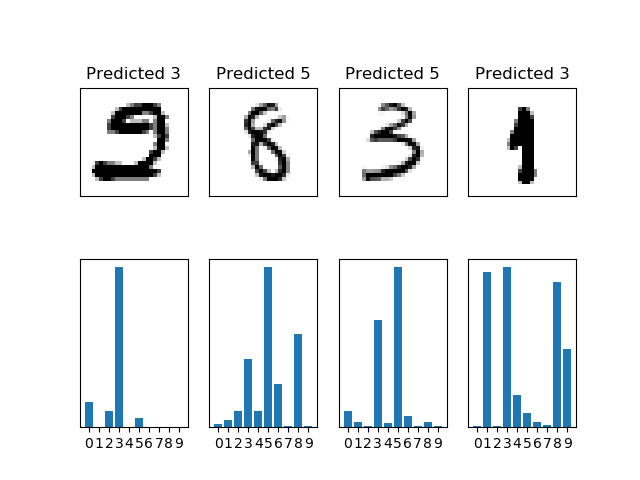

In [13]:
axes = plt.subplots(2, 4)[1]  # creates a grid of 10 plots

# More details about zip() function here https://docs.python.org/3.3/library/functions.html#zip
y_pred = clf4.predict(X_test)
j = 0 # Index which iterates over plots
for true_label, pred_label, image in list(zip(y_test, y_pred, X_test)):
    if j == 4: # We only want to look at 4 first mistakes
        break
    if true_label != pred_label:
        # Plotting predicted probabilities
        axes[1, j].bar(np.arange(10), clf4.predict_proba(image.reshape(1, -1))[0]) 
        axes[1, j].set_xticks(np.arange(10))
        axes[1, j].set_yticks([])
        
        # Plotting the image
        axes[0, j].imshow(image.reshape((28, 28)), cmap=plt.cm.gray_r, interpolation='nearest')
        axes[0, j].set_xticks([])
        axes[0, j].set_yticks([])
        axes[0, j].set_title('Predicted {}'.format(pred_label))
        j += 1
        
#         plt.xticks(x, ('Bill', 'Fred', 'Mary', 'Sue'))
#         axex[1, j].plot()

--------------------------------------------------------------------------------------------------------------------

# Changing the Loss function

It often happens that the accuracy is not the right way to evaluate the performance. ```sklearn``` has a large variety of other metrics both in classification and regression. See https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

Here we want to understand how to change the cross-validation metric with minimal effort.

**SVM Classifier + Pipeline + New score function**

In [14]:
# SVM Classifier + Pipeline + New score function

pipe = Pipeline([('scaler', MaxAbsScaler()), ('svc', svc)])
parameters6 = {'svc__C': np.logspace(-8, 8, 17, base=2)} # defining parameter space
balanced_scorer = make_scorer(balanced_accuracy_score)

clf6 = GridSearchCV(pipe, parameters6, cv=3, scoring=balanced_scorer)
clf6.fit(X_train, y_train)

print('Returned hyperparameter: {}'.format(clf6.best_params_))
print('Best Balanced accuracy in train is: {}'.format(clf6.best_score_))
print('Balanced accuracy on test is: {}'.format(clf6.score(X_test, y_test)))

Returned hyperparameter: {'svc__C': 0.015625}
Best Balanced accuracy in train is: 0.8612334093654231
Balanced accuracy on test is: 0.825627008328415


**The confusion matrix**

In [15]:
confusion_matrix(y_test, clf6.predict(X_test))

array([[22,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 24,  0,  0,  0,  0,  0,  0,  2,  0],
       [ 0,  0, 14,  1,  1,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 18,  0,  3,  0,  0,  1,  1],
       [ 0,  1,  0,  0, 17,  0,  0,  0,  0,  2],
       [ 1,  0,  0,  1,  0,  6,  0,  1,  0,  1],
       [ 1,  2,  1,  0,  0,  0, 20,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0, 15,  0,  0],
       [ 0,  2,  0,  1,  0,  3,  0,  0, 11,  0],
       [ 0,  0,  0,  0,  2,  0,  0,  2,  1, 21]], dtype=int64)

# PART 2 -- Problem

The data that we have contains images with $10$ classes. Normally, accuracy is a reasonable choice of the loss function to be optimized, but in this problem we *really* do not like when digits from $\{5, 6, 7, 8, 9\}$ are predicted to be from $\{0, 1, 2, 3, 4\}$. We present hereafter a new score function to address our concern.

**Our score function**

In [16]:
def new_score(y_true, y_pred):
    error = 0.
    y_true = y_true.astype(np.int64)
    y_pred = y_pred.astype(np.int64)
    for tr, pr in zip(y_true, y_pred):
        if tr != pr:
            error = error + 1
            if tr >= 5 and pr <= 4:
                error = error + 2
    return 1 - error/(len(y_true)+2*len(y_true>=5))

**Our score function + Our best classifier (Random Forest Classifier)**

In [17]:
#Random Forest algorithm
pipe = Pipeline([('scaler', StandardScaler()), ('randomforest', RandomForestClassifier(random_state=42))])
parameters7 = {'randomforest__n_estimators': list(range(100, 2001, 100))} # defining parameter space

my_scorer = make_scorer(new_score, greater_is_better=True)

clf7 = GridSearchCV(pipe, parameters7, cv=3, scoring=my_scorer)

clf7.fit(X_train, y_train)
print('Returned hyperparameter: {}'.format(clf7.best_params_))
print('Classification accuracy on train is: {}'.format(clf7.score(X_train, y_train)))
print('Classification accuracy on test is: {}'.format(clf7.score(X_test, y_test)))

Returned hyperparameter: {'randomforest__n_estimators': 1900}
Classification accuracy on train is: 1.0
Classification accuracy on test is: 0.9616666666666667


We can see the confusion matrix :

**Confusion matrix - Random forest with accuracy score**

In [20]:
confusion_matrix(y_test, clf7.predict(X_test))

array([[22,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 26,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0, 14,  0,  1,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 21,  0,  1,  0,  0,  0,  1],
       [ 0,  0,  0,  0, 19,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0, 10,  0,  0,  0,  0],
       [ 0,  1,  1,  0,  0,  0, 22,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 15,  0,  1],
       [ 0,  1,  0,  1,  0,  0,  0,  0, 15,  0],
       [ 0,  0,  0,  0,  1,  0,  0,  1,  1, 23]], dtype=int64)

**Our score function + SVM Classifier**

In [19]:
# SVM Classifier + Pipeline + Our New score function

pipe = Pipeline([('scaler', MaxAbsScaler()), ('svc', svc)])
parameters8 = {'svc__C': np.logspace(-8, 8, 17, base=2)} # defining parameter space

clf8 = GridSearchCV(pipe, parameters8, cv=3, scoring=my_scorer)
clf8.fit(X_train, y_train)

print('Returned hyperparameter: {}'.format(clf8.best_params_))
print('Best Balanced accuracy in train is: {}'.format(clf8.best_score_))
print('Balanced accuracy on test is: {}'.format(clf8.score(X_test, y_test)))

Returned hyperparameter: {'svc__C': 0.015625}
Best Balanced accuracy in train is: 0.92766729748239
Balanced accuracy on test is: 0.9066666666666666


We can see the confusion matrix :

**Confusion matrix - Random forest with our score**

In [21]:
confusion_matrix(y_test, clf8.predict(X_test))

array([[22,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 24,  0,  0,  0,  0,  0,  0,  2,  0],
       [ 0,  0, 14,  1,  1,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 18,  0,  3,  0,  0,  1,  1],
       [ 0,  1,  0,  0, 17,  0,  0,  0,  0,  2],
       [ 1,  0,  0,  1,  0,  6,  0,  1,  0,  1],
       [ 1,  2,  1,  0,  0,  0, 20,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0, 15,  0,  0],
       [ 0,  2,  0,  1,  0,  3,  0,  0, 11,  0],
       [ 0,  0,  0,  0,  2,  0,  0,  2,  1, 21]], dtype=int64)